## Consumer mall dataset

In [1]:
import pandas as pd

# Substitute the path_to_file content by the path to your csv file 
path_to_file = '../../datasets/dbscan/dbscan-with-python-and-scikit-learn-shopping-data.csv'
customer_data = pd.read_csv(path_to_file)

In [2]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
customer_data.shape

(200, 5)

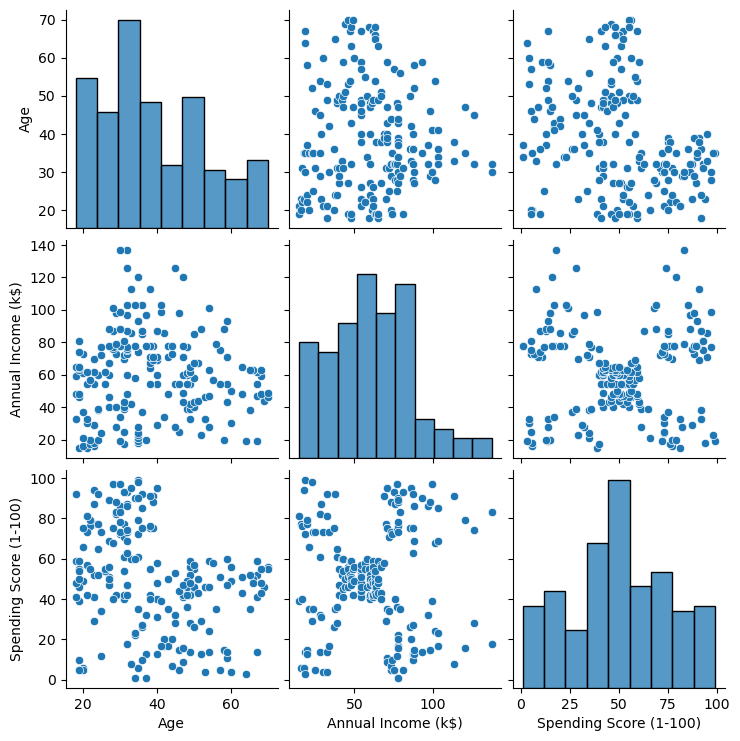

In [4]:
import seaborn as sns

# Dropping CustomerID column from data 
customer_data = customer_data.drop('CustomerID', axis=1)

sns.pairplot(customer_data);#.title('Combination of variables distribution and scatterplot');

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
customer_data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [7]:
selected_cols = ['Annual Income (k$)', 'Spending Score (1-100)']
customer_data = customer_data[selected_cols]

In [8]:
ss = StandardScaler()
scaled_data = ss.fit_transform(customer_data)
scaled_customer_data = pd.DataFrame(columns=selected_cols, data=scaled_data)

In [9]:
customer_data.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [10]:
# sns.scatterplot(data=customer_data, 
#                 x='Annual Income (k$)', y = 'Spending Score (1-100)');

In [11]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nn = NearestNeighbors(n_neighbors=5)   # minpoints - 1
nbrs = nn.fit(scaled_customer_data)
distances, indices = nbrs.kneighbors(scaled_customer_data)
# distances[:,1]
distances = np.sort(distances, axis=0)
distances = distances[:,1]

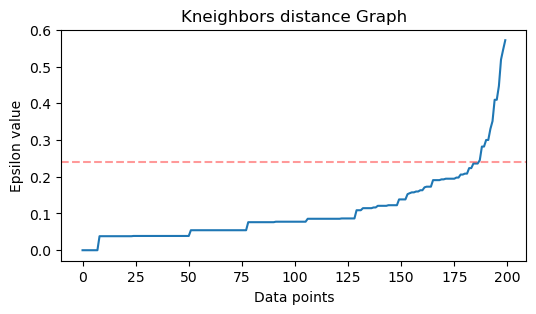

In [12]:
plt.figure(figsize=(6,3))
plt.plot(distances)
plt.axhline(y=0.24, color='r', linestyle='--', alpha=0.4)
plt.title('Kneighbors distance Graph')
plt.xlabel('Data points')
plt.ylabel('Epsilon value')
plt.show()

In [13]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.24, min_samples=5).fit(scaled_customer_data)
labels = dbs.labels_

In [14]:
scaled_customer_data['labels'] = labels
scaled_customer_data.head()

,Annual Income (k$),Spending Score (1-100),labels
0,-1.738999,-0.434801,-1
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,-1
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,-1


In [15]:
# db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 62


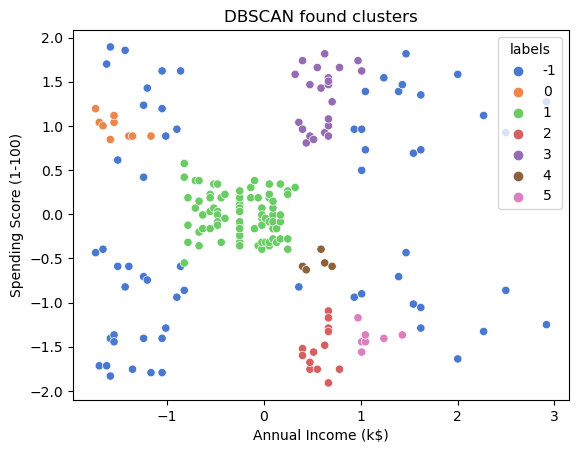

In [16]:
sns.scatterplot(data=scaled_customer_data, 
                x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='labels', palette='muted').set_title('DBSCAN found clusters');

In [17]:
from sklearn import metrics
print(f"Silhouette Coefficient: {metrics.silhouette_score(customer_data.iloc[:, :2], labels):.3f}")

Silhouette Coefficient: 0.178


In [18]:
# import seaborn as sns
# from sklearn.metrics.cluster import adjusted_rand_score

In [19]:
# adding clustered labels to dataframe
# df['cluster'] = dbs.labels_

In [20]:
# df

In [21]:
# from mpl_toolkits import mplot3d
# import numpy as np
# #deixa o grafico 3d
# %matplotlib notebook 

In [22]:
# plotting graph with labels